In [1]:
import sys 
sys.path.insert(0, "..")
import glob as glob
import os
import pandas as pd
from Bio import SeqIO
import matplotlib.pyplot as plt
import numpy as np
from helpers.plots import MotifMetrics, LoadedMotifMetrics, MetricsHandler

In [2]:
folders = "/home/lukas/Projects/test/3_prime_UTR/"

In [3]:
# read fa file into pd dataframe
def read_fa(file_name):
    sequences = []
    ids = []
    species = []
    pos = []
    for s in SeqIO.parse(file_name, "fasta"):
        infos = s.id.split(":")
        ids.append(infos[0])
        species.append(infos[1])
        pos.append(infos[2])

        # exception for old file
        if len(infos) == 4:
            pos[-1] = infos[3]
        
        sequences.append(str(s.seq).upper())
    return pd.DataFrame({"seq":sequences, "id":ids, "species":species, "pos":pos})


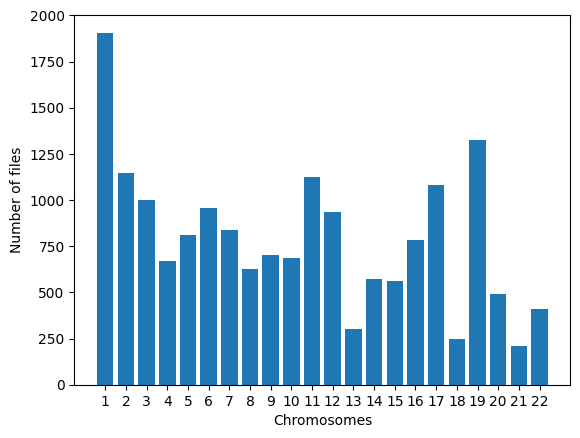

In [4]:
founds = []
for chrom in range(1,23):
    founds.append(len(glob.glob(folders + f"*/*_chr{chrom}_*.fa")))
# plot barplot for founds
plt.clf()        
plt.bar(range(1,len(founds)+1), founds)
plt.xlabel("Chromosomes")
plt.ylabel("Number of files")
plt.xticks(range(1,len(founds)+1))
print()

In [5]:
old_file="/home/lukas/Projects/test/Homo_sapiens_3prime_UTR.fa"
old_data = read_fa(old_file)
print(len(old_data))

18134


In [6]:
test = True
all_fa_files = glob.glob(f"{folders}/*/*.fa")
all_fa_files = list(map(lambda x: os.path.basename(x), all_fa_files))
x1 = len(all_fa_files)
x2 = len(np.unique(all_fa_files))
print(x1)
print(x2)
print(len(old_data))

18178
18178
18134


Seems like every file is unique, but Homo sapiens is missing in a couple

In [7]:
not_contained = []
for i, f in enumerate(all_fa_files):
    if i % 1000 == 0:
        print(f"{i}/{len(all_fa_files)}")
    
    if len(old_data.loc[old_data["id"] == f[:-3]]) == 0:
        not_contained.append(f)


0/18178
1000/18178
2000/18178
3000/18178
4000/18178
5000/18178
6000/18178
7000/18178
8000/18178
9000/18178
10000/18178
11000/18178
12000/18178
13000/18178
14000/18178
15000/18178
16000/18178
17000/18178
18000/18178


In [8]:
for f in not_contained:
    file = glob.glob(folders + "*/" + f)[0]
    check_df = read_fa(file)
    break
print(check_df.head())

                                                 seq  \
0  GTAACCAAGGAGCAGTGAACAGCAGCTACTACAGTAGTGGAAGCCG...   
1  GCAGCCAAGGAGCAGTGAACAGCAGCTACTACAGTAGTGGAAGCCG...   
2  GTAGCCAAGGAACAGTGAACAGCAGCTACTACAGTAGCGGAAGCCG...   
3  GCGGCCAAGGCGCAGCGAACAGCAGCTACTACAGTAGCGGGAGCCG...   
4  GCAGCCAAGGAGCAGTGAACAGCAGCTACTACAGTAGTGGAAGCCG...   

                                             id                 species  pos  
0  ENST00000393432.9_utr3_13_0_chr5_179614178_r            Homo_sapiens  782  
1  ENST00000393432.9_utr3_13_0_chr5_179614178_r        Acinonyx_jubatus  782  
2  ENST00000393432.9_utr3_13_0_chr5_179614178_r        Acomys_cahirinus  782  
3  ENST00000393432.9_utr3_13_0_chr5_179614178_r  Ailuropoda_melanoleuca  782  
4  ENST00000393432.9_utr3_13_0_chr5_179614178_r         Ailurus_fulgens  782  


-> seems to contain Homo_sapiens... maybe something else was wrong in this file

In [19]:
def calculate_conservation(id, folder, position_start=15, position_end=20):
    file = glob.glob(f"{os.path.join(folder, f'*/{id}*.fa')}")[0]
    df = read_fa(file)

    motif_hs = df.loc[df["species"] == "Homo_sapiens"]["seq"][0][position_start:position_end]
    print(motif_hs)
    seqs = list(map(lambda x: x[position_start:position_end], list(df["seq"])))

    # conservation score is number of times motif_hs appears in seqs / len(seqs)
    conservation_score = seqs.count(motif_hs)/len(seqs)
    return conservation_score
    

calculate_conservation(id="ENST00000393432.9_utr3_13_0_chr5_179614178_r", folder = folders)

TGAAC


0.7385892116182573